#### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Loading dataset

In [2]:
df_movies = pd.read_csv('rt_cleaned.csv')
df_movies

,movie_title,directors,production_company,critic_name,review_content,review_type,cleaned_reviews,POS_tagged,Lemma,Subjectivity,Polarity,textblob_analysis
0,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,20th Century Fox,Andrew L. Urban,A fantasy adventure that fuses Greek mythology...,Positive,A fantasy adventure that fuses Greek mythology...,"[('fantasy', 'a'), ('adventure', 'n'), ('fuses...",fantasy adventure fuse Greek mythology conte...,0.041667,0.041667,Positive
1,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,20th Century Fox,Louise Keller,"Uma Thurman as Medusa, the gorgon with a coiff...",Positive,Uma Thurman as Medusa the gorgon with a coiffu...,"[('Uma', 'n'), ('Thurman', 'n'), ('Medusa', 'n...",Uma Thurman Medusa gorgon coiffure writhe sn...,1.000000,0.700000,Positive
2,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,20th Century Fox,NaN,With a top-notch cast and dazzling special eff...,Positive,With a top notch cast and dazzling special eff...,"[('top', 'a'), ('notch', 'n'), ('cast', 'n'), ...",top notch cast dazzle special effect tide te...,0.267857,0.214286,Positive
3,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,20th Century Fox,Ben McEachen,Whether audiences will get behind The Lightnin...,Positive,Whether audiences will get behind The Lightnin...,"[('Whether', 'n'), ('audiences', 'n'), ('get',...",Whether audience get behind Lightning Thief ...,0.470887,0.049242,Positive
4,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,20th Century Fox,Bill Goodykoontz,"Percy Jackson isn't a great movie, but it's a ...",Positive,Percy Jackson isn t a great movie but it s a g...,"[('Percy', 'n'), ('Jackson', 'n'), ('great', '...",Percy Jackson great movie good one trot kern...,0.462500,0.500000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
735918,Zulu,"Cy Endfield, Cyril Endfield",Paramount Pictures,NaN,As a spectacular war film with a powerful mora...,Positive,As a spectacular war film with a powerful mora...,"[('spectacular', 'a'), ('war', 'n'), ('film', ...",spectacular war film powerful moral dimension,0.716667,0.300000,Positive
735919,Zulu,"Cy Endfield, Cyril Endfield",Paramount Pictures,Isabel Quigly,"The tension mounts, breaks, mounts, seems unbe...",Positive,The tension mounts breaks mounts seems unbeara...,"[('tension', 'n'), ('mounts', 'n'), ('breaks',...",tension mount breaks mount seem unbearable b...,0.543651,0.222222,Positive
735920,Zulu,"Cy Endfield, Cyril Endfield",Paramount Pictures,Joan Didion,A rousing reconstruction of the 1879 Battle of...,Positive,A rousing reconstruction of the Battle of Rork...,"[('rousing', 'v'), ('reconstruction', 'n'), ('...",rouse reconstruction Battle Rorke Drift,0.000000,0.000000,Neutral
735921,Zulu Dawn,Douglas Hickox,Tango Entertainment,Ken Hanke,"Seen today, it's not only a startling indictme...",Positive,Seen today it s not only a startling indictmen...,"[('Seen', 'a'), ('today', 'n'), ('startling', ...",Seen today startling indictment British impe...,0.416667,0.083333,Positive


#### Spliting dataset into data training and testing

In [3]:
X = df_movies['cleaned_reviews']
y = df_movies['textblob_analysis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((515146,), (220777,), (515146,), (220777,))

#### Checking for stratified split

In [5]:
print(y_train.value_counts())
print(y_test.value_counts())

Positive    293925
Negative    167813
Neutral      53408
Name: textblob_analysis, dtype: int64
Positive    125968
Negative     71920
Neutral      22889
Name: textblob_analysis, dtype: int64


In [6]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Positive    0.570566
Negative    0.325758
Neutral     0.103675
Name: textblob_analysis, dtype: float64
Positive    0.570567
Negative    0.325759
Neutral     0.103675
Name: textblob_analysis, dtype: float64


Stratify has maintained the split of neutral, positive & negative review in the dataset

#### Model training
A Pipeline class was used to make the vectorizer => classifier easier to work with. PipeLine will both create a TF-IDF Vector out of the raw text data and fit a Naive Bayes classifier. TF-IDF indicates what the importance of the word is in order to understand the dataset. Then the pipeline will fit on the training data.

In [7]:
tfidf = TfidfVectorizer()
mnb = MultinomialNB()

model = Pipeline([('vectorizer',tfidf)
                  ,('classifier',mnb)])

model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [8]:
y_pred_train = model.predict(X_train)
print(f'Training Accuracy Score: {round(accuracy_score(y_train, y_pred_train)*100, 4)}%')

Training Accuracy Score: 75.464%


#### Model testing

In [9]:
y_pred_test = model.predict(X_test)
print(f'Testing Accuracy Score: {round(accuracy_score(y_test, y_pred_test)*100, 4)}%')

Testing Accuracy Score: 73.5593%


#### Model evaluation

Classification report

In [10]:
print("Evaluation of MultinomialNB with train-test split:")
print()
print(classification_report(y_test, y_pred_test))
print()
print("Accuracy : ", accuracy_score(y_test, y_pred_test))
print("Precision : ", precision_score(y_test, y_pred_test, average = 'weighted'))
print("Recall : ", recall_score(y_test, y_pred_test, average = 'weighted'))
print("F1-Score : ", f1_score(y_test, y_pred_test, average = 'weighted'))

Evaluation of MultinomialNB with train-test split:

              precision    recall  f1-score   support

    Negative       0.91      0.53      0.67     71920
     Neutral       0.87      0.03      0.06     22889
    Positive       0.69      0.98      0.81    125968

    accuracy                           0.74    220777
   macro avg       0.82      0.51      0.52    220777
weighted avg       0.78      0.74      0.69    220777


Accuracy :  0.735592928611223
Precision :  0.7825594222762731
Recall :  0.735592928611223
F1-Score :  0.6885011644781492


Confusion matrix

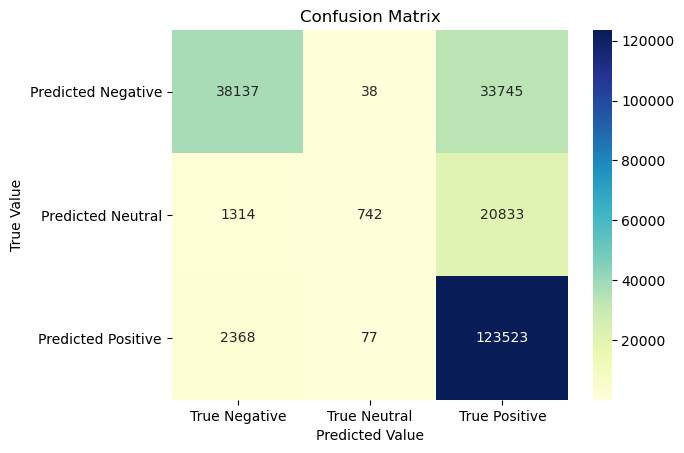

In [11]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['True Negative', 'True Neutral', 'True Positive'], 
                        index=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()